# Projet Traitement et Données Large Échelle

Zoé MARQUIS & Charlotte KRUZIC

## Exécution des scripts d'installation 

TODO : AJOUTER LE NOM DES FICHIERS BASH UNE FOIS QU'IlS SONT CORRECTS

Nous avons initialement exploré la possibilité d'exécuter nos scripts sur Google Colab afin de faciliter l'exécution sans que vous ayez à configurer quoi que ce soit sur votre machine locale. Cependant, Colab présente certaines limitations, notamment l'incapacité de gérer plusieurs réplicas sets, car il ne permet de travailler qu'avec un seul environnement d'exécution.

Pour pouvoir simuler plusieurs réplicas sets dans notre projet, nous avons besoin de plusieurs nœuds, ce qui n'est pas possible sur Colab. Nous avons également essayé d'utiliser des solutions gratuites comme Datastax (ou une autre plateforme similaire), mais ces services ne permettaient pas de configurer correctement les réplicas sets, ce qui limitait la flexibilité nécessaire à notre projet.

En conséquence, nous avons opté pour une autre solution : créer des fichiers de configuration, comme cela est souvent demandé dans les exercices de type TP MongoDB. Cette approche permet de travailler de manière plus flexible tout en maintenant un contrôle total sur les paramètres des réplicas sets.

Une autre remarque importante : le projet a été testé avec Python 3.11, car Python 3.12 a introduit quelques incompatibilités qui ont causé des bugs. Il est donc recommandé d'utiliser Python 3.11 pour éviter ces problèmes.

In [ ]:
# TODO : Dire qu'on a utilisé mySQL et pourquoi on a changé

## Comparaison de Performances entre Systèmes Relationnels et NoSQL : Étude de Cas avec le Catalogue Netflix

Dans ce projet, nous comparons les performances entre un système de base de données relationnel (SQLite) et un système NoSQL (Cassandra), en utilisant le **catalogue Netflix** comme jeu de données.   
Ce dataset, disponible en Open Data, offre une structure réaliste et adaptée pour explorer les différences entre ces deux approches de gestion de données.   
L'objectif principal est d'évaluer les performances pour des opérations d'insertion, mise à jour et requêtes complexes, tout en analysant les spécificités du système NoSQL choisi.

### Jeu de données

Le jeu de données utilisé contient des informations sur les films et séries disponibles sur Netflix, avec les attributs suivants : 
- `show_id` : Identifiant unique pour chaque émission ou film. 
- `type` 
- `title`
- `director` 
- `cast`
- `country`
- `date_added` 
- `release_year` 
- `rating` 
- `duration` 
- `listed_in` 
- `description`

### Schéma de données

```sql
CREATE TABLE IF NOT EXISTS shows (
    show_id INT PRIMARY KEY,
    title TEXT,
    type TEXT,
    director TEXT,
    cast TEXT,
    country TEXT,
    date_added TEXT,
    release_year INT,
    rating TEXT,
    duration TEXT,
    listed_in TEXT,
    description TEXT
);
```


---

## Fonctionnement de Cassandra
Apache Cassandra est un système de gestion de bases de données NoSQL conçu pour gérer de grandes quantités de données réparties sur plusieurs serveurs tout en maintenant une haute disponibilité et une tolérance aux pannes. Contrairement aux bases de données relationnelles, Cassandra suit un modèle décentralisé, ce qui lui permet de scaler facilement et d'offrir une forte résilience.

### Modèle de données de Cassandra :

Le modèle de données de Cassandra repose sur quelques concepts clés qui diffèrent des systèmes relationnels traditionnels.

- **Keyspace** :  
Un Keyspace dans Cassandra est l'équivalent d'une base de données dans les systèmes relationnels. Il sert à regrouper des tables (ou Column Families) et définit la stratégie de réplication des données. Par exemple, il spécifie le nombre de répliques à conserver pour chaque donnée afin d'assurer une haute disponibilité et une tolérance aux pannes. La réplication des données dans Cassandra suit des stratégies comme "SimpleStrategy" (réplication sur tous les nœuds) ou "NetworkTopologyStrategy" (réplication sur des nœuds répartis sur plusieurs centres de données).
- **Column Family** :  
Une Column Family dans Cassandra est équivalente à une table relationnelle, mais avec une flexibilité plus grande. Chaque Column Family contient plusieurs colonnes, et contrairement aux bases de données relationnelles, les colonnes n'ont pas besoin d'être définies à l'avance. Elles peuvent être ajoutées dynamiquement au fil du temps, ce qui permet d'évoluer facilement sans migrations complexes.
- **Key (Clé primaire)** :  
Chaque ligne dans une Column Family est identifiée par une clé unique. Cette clé est utilisée pour partitionner et localiser les données efficacement. Elle peut être composée d'un seul champ (clé primaire simple) ou de plusieurs champs (clé primaire composée). Par exemple, dans une table contenant des films, une clé primaire pourrait être show_id (identifiant du film).
- **Colonnes** :  
Les données dans Cassandra sont stockées sous forme de colonnes. Chaque colonne a trois composants essentiels :
    - Nom : Le nom de la colonne (par exemple, title, release_year).
    - Valeur : La donnée proprement dite (par exemple, "Inception", "2010").
    - Timestamp : Le timestamp associé à la colonne, qui permet de gérer les versions des données et de résoudre les conflits de réplication, ce qui est essentiel dans un système distribué. Il permet de savoir quelle version d'une colonne est la plus récente.  
Ces colonnes sont indépendantes les unes des autres. Cela signifie qu'elles peuvent être insérées, mises à jour ou supprimées sans impacter les autres colonnes dans la même ligne.
- **Super Colonnes** :  
Les Super Colonnes sont une structure plus avancée dans Cassandra. Elles permettent de regrouper plusieurs colonnes sous un même nom de "super colonne". Cela permet de créer des structures hiérarchiques ou imbriquées dans les données, où une super colonne peut contenir plusieurs colonnes. Ce mécanisme est utile pour des cas complexes, mais il est désormais souvent moins utilisé au profit de modèles de données plus simples.

Source : 
- http://www-igm.univ-mlv.fr/~dr/XPOSE2010/Cassandra/modele.html

### Architecture de Cassandra :

L'architecture de Cassandra est décentralisée et repose sur un modèle peer-to-peer, ce qui signifie qu'il n'y a pas de nœud maître ou de coordination centralisée. Tous les nœuds sont égaux et partagent le même rôle. Cela permet une grande scalabilité et une tolérance aux pannes.

- Partitions et Réplication : Cassandra répartit les données entre différents nœuds via un mécanisme de partitionnement basé sur un hash de la clé primaire. Chaque nœud du cluster stocke une portion des données, et des répliques de ces données peuvent être présentes sur plusieurs nœuds, selon la stratégie de réplication définie dans le Keyspace. Cela permet à Cassandra d'assurer une haute disponibilité, même en cas de panne d'un ou plusieurs nœuds.
- Consistence et Quorum : Cassandra suit un modèle de consistance configurable, permettant de choisir entre des garanties de consistance fortes ou une consistance plus faible en fonction des besoins. Cela se configure via les paramètres Read Consistency Level et Write Consistency Level. Par exemple, un niveau de consistance QUORUM signifie qu'une opération de lecture ou d'écriture devra être validée par la majorité des répliques d'une donnée avant de réussir.

# TODO : ajouter une source

### Requêtes et Modèle de Consistance :

Les requêtes dans Cassandra utilisent le Cassandra Query Language (CQL), qui ressemble à SQL mais avec des différences significatives adaptées aux particularités du modèle NoSQL.

- Clé primaire et partitions : Dans Cassandra, la clé primaire détermine comment les données sont partitionnées et distribuées à travers les nœuds du cluster. Il est essentiel de bien concevoir cette clé pour assurer des performances optimales. La clé primaire peut être composée de :
    - Partition key : La clé utilisée pour déterminer la partition sur un nœud.
    - Clustering key : La clé qui permet de trier les données au sein d'une même partition.
- Sélection et filtrage : Cassandra fonctionne très bien pour les requêtes basées sur la clé primaire. Les requêtes qui filtrent sur d'autres colonnes nécessitent l'utilisation d'index secondaires ou d'une modélisation spécifique des données pour garantir de bonnes performances. Si vous tentez de filtrer sur une colonne sans index, vous recevrez une erreur ALLOW FILTERING, ce qui signifie que la requête pourrait être très coûteuse en termes de performance.

### Avantages et Inconvénients de Cassandra :

#### Avantages :
- Haute scalabilité horizontale (ajout facile de nœuds).
- Résilience et tolérance aux pannes grâce à la réplication des données.
- Facilité d'ajout de nouvelles colonnes sans affecter les données existantes.
#### Inconvénients :
- Consistance éventuelle : Cassandra privilégie la disponibilité et la partitionnement des données, parfois au détriment de la consistance immédiate.
- Pas de support pour les jointures, les transactions complexes ou les relations entre tables, ce qui oblige à repenser la manière de modéliser les données. Ceci est le cas pour toutes les bases de données NoSQL.

### Conclusion :
Cassandra est une base de données extrêmement puissante pour les cas d'utilisation à grande échelle et hautement distribués, avec une grande tolérance aux pannes. Cependant, sa conception impose certaines contraintes sur la manière de structurer les données, et une bonne compréhension de son modèle de partitionnement est essentielle pour garantir de bonnes performances. Les applications qui nécessitent des requêtes complexes et des jointures devront probablement repenser leur modèle de données ou utiliser des outils supplémentaires pour effectuer des analyses en dehors de Cassandra.

## Fonctionnement de SQLite
SQLite est une base de données relationnelle légère, autonome et sans serveur, idéale pour les applications qui nécessitent une gestion locale des données sans nécessiter de serveur de base de données externe. Voici les principaux points qui caractérisent son fonctionnement :

- Base de données embarquée : Contrairement aux systèmes de gestion de base de données classiques (comme MySQL ou PostgreSQL), SQLite est une base de données embarquée, ce qui signifie qu'elle est directement intégrée dans l'application sans nécessiter de processus serveur séparé. Toutes les données sont stockées dans un fichier unique sur le disque.
- Structure relationnelle : SQLite suit le modèle relationnel classique, avec des tables, des colonnes et des lignes. Il prend en charge les requêtes SQL classiques (SELECT, INSERT, UPDATE, DELETE), et permet la gestion des contraintes, des index et des transactions ACID (Atomicité, Cohérence, Isolation, Durabilité).
- Pas de gestion de serveur : SQLite ne nécessite pas d'installation de serveur ni de configuration complexe, ce qui simplifie grandement son utilisation pour des applications légères, des prototypes ou des applications mobiles. Cela permet également une gestion plus simple des données localement, sans besoin de se soucier de la gestion d'un serveur distant.
- Performance : Bien que très performant pour des opérations locales et des volumes de données modestes, SQLite n'est pas conçu pour les applications à grande échelle nécessitant une scalabilité horizontale ou une haute disponibilité. C'est une excellente solution pour des applications mononucléaires ou pour des projets qui ne nécessitent pas de réplication de données.
- Transactions ACID : SQLite assure l'intégrité des données grâce à son modèle transactionnel, ce qui garantit que les opérations sont atomiques et cohérentes. Cependant, sa gestion des transactions simultanées est moins robuste que dans des systèmes plus avancés comme PostgreSQL ou Cassandra.

TODO : ajouter une source

---
## Installer les outils

In [ ]:
# TODO : Faire un fichier de requirement pour ca plutot non ?

In [41]:
!pip install plotly 

In [42]:
!pip install matplotlib

In [43]:
!pip install pandas
# pour manipuler des dataframes et charger les données de kaggle

In [44]:
!pip install cassandra-driver

In [45]:
# TODO à vérifier sur ubuntu et mac e fonctoin de comment on a fait les scripts d'installation
# # 🚨 sur linux 
# !apt-get update
# !apt-get install -y openjdk-11-jdk
# !apt-get install libev-dev
# !apt-get install cassandra

# # 🚨 sur mac
# !brew install openjdk@17
# !brew install libev
# !brew install cassandra


In [46]:
!pip install kagglehub
# installer kagglehub pour récupérer le dataset

In [47]:
!pip install tabulate

## Importation des données

In [ ]:
# TODO : Mettre tous les import ici

In [48]:
import kagglehub

path = kagglehub.dataset_download("shivamb/netflix-shows")
print("Chemin vers le fichier du dataset : ", path)

Chemin vers le fichier du dataset :  /Users/zoemarquis/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


In [49]:
import os
files = os.listdir(path)
print("Nom du fichier : ", files)

Nom du fichier :  ['netflix_titles.csv']


In [50]:
import pandas as pd

filename = f"{path}/{files[0]}"
df_initial = pd.read_csv(filename)

In [51]:
from tabulate import tabulate

print(tabulate(df_initial.head(10), headers='keys', tablefmt='psql'))

+----+-----------+---------+----------------------------------+-------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------+--------------------+----------------+----------+------------+---------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | show_id   | type    | title                            | director                      | cast                                                                                                                                                

In [52]:
# afficher le nombre de lignes dans le dataset
print(f"Nombre de lignes : {len(df_initial)}")

Nombre de lignes : 8807


In [53]:
# types des colonnes
print(df_initial.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [54]:
# Convertir la colonne show_id en int en enlevant le préfixe 's' (plus simple pour gérer exactement le meme type de données en Cassandra et MySQL)
df_initial['show_id'] = df_initial['show_id'].str.replace('s', '').astype(int).astype(int)

df_initial['show_id'] = df_initial['show_id'].astype(int)
df_initial['release_year'] = df_initial['release_year'].astype(int)

df_initial['type'] = df_initial['title'].astype(str)
df_initial['title'] = df_initial['title'].astype(str)
df_initial['director'] = df_initial['director'].astype(str)
df_initial['cast'] = df_initial['cast'].astype(str)
df_initial['country'] = df_initial['country'].astype(str)
df_initial['date_added'] = df_initial['date_added'].astype(str)
df_initial['rating'] = df_initial['rating'].astype(str)
df_initial['duration'] = df_initial['duration'].astype(str)
df_initial['listed_in'] = df_initial['listed_in'].astype(str)
df_initial['description'] = df_initial['description'].astype(str)

In [55]:
# types des colonnes
print(df_initial.dtypes)

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


## CRUD : Create, Read, Update, Delete
- Create (*Insert*) : Insérer des données dans la base de données.
- Read (*Select*) : Récupérer des données.
- Update (*Update*) : Modifier des données existantes.
- Delete (*Delete*) : Effacer des données.

In [56]:
schema = """
CREATE TABLE IF NOT EXISTS shows (
    show_id INT PRIMARY KEY,
    title TEXT,
    type TEXT,
    director TEXT,
    cast TEXT,
    country TEXT,
    date_added TEXT,
    release_year INT,
    rating TEXT,
    duration TEXT,
    listed_in TEXT,
    description TEXT
);
"""

In [57]:
data_zoe_charlotte = {
    'show_id': [0],
    'title': ['Zoé & Charlotte'],
    'type': ['Movie'],
    'director': ['Christopher Nolan'],
    'cast': ['Leonardo DiCaprio, Joseph Gordon-Levitt'],
    'country': ['USA'],
    'date_added': ['2021-01-01'],
    'release_year': [2001],
    'rating': ['PG-13'],
    'duration': ['148 min'],
    'listed_in': ['Action, Sci-Fi'],
    'description': ['A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a CEO.']
}
df_zoe_charlotte = pd.DataFrame(data_zoe_charlotte)

### SQLite

In [58]:
import sqlite3

# Créer une base de données SQLite en mémoire
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

def drop_table_sqlite():
    cursor.execute("DROP TABLE IF EXISTS shows;")
    conn.commit()

def create_table_sqlite():
    # Crée ta table ici
    cursor.execute(schema)
    conn.commit()

drop_table_sqlite()
create_table_sqlite()


In [59]:
import time

# --- CREATE ---
def sqlite_insert(df):
    drop_table_sqlite()
    create_table_sqlite()
    columns = ', '.join(df.columns)
    placeholders = ', '.join(['?'] * len(df.columns))
    insert_query = f"INSERT INTO shows ({columns}) VALUES ({placeholders})"

    start_time = time.time()
    for _, row in df.iterrows():
      cursor.execute(insert_query, tuple(row))
    conn.commit()

    create_time_sqlite = time.time() - start_time
    print(f"Create Time: {create_time_sqlite:.6f} seconds")
    return create_time_sqlite

# --- READ ---
def sqlite_read(df):
    # drop_table_sqlite()
    # create_table_sqlite()
    sqlite_insert(df)
    start_time = time.time()
    cursor.execute("SELECT * FROM shows WHERE release_year > 2000")
    result = cursor.fetchall()
    read_time_sqlite = time.time() - start_time
    print(f"Read Time: {read_time_sqlite:.6f} seconds")
    print(f"Queried {len(result)} records")
    return read_time_sqlite

# --- UPDATE ---
def sqlite_update(df):
    # drop_table_sqlite()
    # create_table_sqlite()
    sqlite_insert(df)
    start_time = time.time()
    cursor.execute("UPDATE shows SET rating='PG' WHERE release_year > 2000")
    conn.commit()
    update_time_sqlite = time.time() - start_time
    print(f"Update Time: {update_time_sqlite:.6f} seconds")
    return update_time_sqlite

# --- DELETE ---
def sqlite_delete(df):
    # drop_table_sqlite()
    # create_table_sqlite()
    sqlite_insert(df)
    start_time = time.time()
    cursor.execute("DELETE FROM shows WHERE release_year > 2000")
    conn.commit()
    delete_time_sqlite = time.time() - start_time
    print(f"Delete Time: {delete_time_sqlite:.6f} seconds")
    return delete_time_sqlite

In [60]:
import numpy as np

# Fonction pour effectuer une opération plusieurs fois et calculer la moyenne et l'écart-type
def benchmark_operation(func, *args):
    times = []
    for _ in range(5):  # Effectuer 5 itérations
        times.append(func(*args))  # Exécuter la fonction avec les arguments
    
    # Calculer la moyenne et l'écart-type
    mean_time = np.mean(times)
    std_time = np.std(times)
    return mean_time, std_time

# --- CREATE ---
create_sqlite_mean, create_sqlite_std = benchmark_operation(sqlite_insert, df_zoe_charlotte)
print(f"CREATE: Mean Time = {create_sqlite_mean:.6f}s, Std Time = {create_sqlite_std:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_sqlite_mean, read_sqlite_std = benchmark_operation(sqlite_read, df_zoe_charlotte)
print(f"READ: Mean Time = {read_sqlite_mean:.6f}s, Std Time = {read_sqlite_std:.6f}s")

# --- UPDATE ---
update_sqlite_mean, update_sqlite_std = benchmark_operation(sqlite_update, df_zoe_charlotte)
print(f"UPDATE: Mean Time = {update_sqlite_mean:.6f}s, Std Time = {update_sqlite_std:.6f}s")

# --- DELETE ---
delete_sqlite_mean, delete_sqlite_std = benchmark_operation(sqlite_delete, df_zoe_charlotte)
print(f"DELETE: Mean Time = {delete_sqlite_mean:.6f}s, Std Time = {delete_sqlite_std:.6f}s")

Create Time: 0.000187 seconds
Create Time: 0.000088 seconds
Create Time: 0.000118 seconds
Create Time: 0.000230 seconds
Create Time: 0.000159 seconds
CREATE: Mean Time = 0.000156s, Std Time = 0.000050s
Total rows in 'shows' table: 1
Create Time: 0.000070 seconds
Read Time: 0.000014 seconds
Queried 1 records
Create Time: 0.000045 seconds
Read Time: 0.000015 seconds
Queried 1 records
Create Time: 0.000037 seconds
Read Time: 0.000009 seconds
Queried 1 records
Create Time: 0.000032 seconds
Read Time: 0.000009 seconds
Queried 1 records
Create Time: 0.000031 seconds
Read Time: 0.000008 seconds
Queried 1 records
READ: Mean Time = 0.000011s, Std Time = 0.000003s
Create Time: 0.000038 seconds
Update Time: 0.000007 seconds
Create Time: 0.000033 seconds
Update Time: 0.000005 seconds
Create Time: 0.000031 seconds
Update Time: 0.000005 seconds
Create Time: 0.000031 seconds
Update Time: 0.000004 seconds
Create Time: 0.000029 seconds
Update Time: 0.000004 seconds
UPDATE: Mean Time = 0.000005s, Std Ti

##### Test d'insertion avec une ligne de DataFrame
Nous avons d'abord testé l'insertion d'une seule ligne de données extraite d'un DataFrame dans notre base de données. Cette étape permet de vérifier que l'insertion fonctionne correctement sur un cas simple, avant de passer à l'insertion de l'ensemble du DataFrame.

À ce stade, l'insertion a été réalisée avec succès sur une ligne de données, ce qui nous permet d'assurer que la logique de base est correcte. Nous allons maintenant procéder à l'insertion du DataFrame complet pour tester la gestion de plusieurs lignes et évaluer les performances d'insertion à plus grande échelle.

In [61]:
# --- CREATE ---
create_sqlite_massive_mean, create_sqlite_massive_std = benchmark_operation(sqlite_insert, df_initial)
print(f"CREATE: Mean Time = {create_sqlite_massive_mean:.6f}s, Std Time = {create_sqlite_massive_std:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_sqlite_massive_mean, read_sqlite_massive_std = benchmark_operation(sqlite_read, df_initial)
print(f"READ: Mean Time = {read_sqlite_massive_mean:.6f}s, Std Time = {read_sqlite_massive_std:.6f}s")

# --- UPDATE ---
update_sqlite_massive_mean, update_sqlite_massive_std = benchmark_operation(sqlite_update, df_initial)
print(f"UPDATE: Mean Time = {update_sqlite_massive_mean:.6f}s, Std Time = {update_sqlite_massive_std:.6f}s")

# --- DELETE ---
delete_sqlite_massive_mean, delete_sqlite_massive_std = benchmark_operation(sqlite_delete, df_initial)
print(f"DELETE: Mean Time = {delete_sqlite_massive_mean:.6f}s, Std Time = {delete_sqlite_massive_std:.6f}s")

Create Time: 0.111055 seconds
Create Time: 0.111093 seconds
Create Time: 0.106047 seconds
Create Time: 0.109397 seconds
Create Time: 0.108058 seconds
CREATE: Mean Time = 0.109130s, Std Time = 0.001912s
Total rows in 'shows' table: 8807
Create Time: 0.106777 seconds
Read Time: 0.011844 seconds
Queried 8245 records
Create Time: 0.108336 seconds
Read Time: 0.011031 seconds
Queried 8245 records
Create Time: 0.109694 seconds
Read Time: 0.010957 seconds
Queried 8245 records
Create Time: 0.110255 seconds
Read Time: 0.010739 seconds
Queried 8245 records
Create Time: 0.106996 seconds
Read Time: 0.047389 seconds
Queried 8245 records
READ: Mean Time = 0.018392s, Std Time = 0.014503s
Create Time: 0.111202 seconds
Update Time: 0.003526 seconds
Create Time: 0.108670 seconds
Update Time: 0.003861 seconds
Create Time: 0.110433 seconds
Update Time: 0.003617 seconds
Create Time: 0.110527 seconds
Update Time: 0.003540 seconds
Create Time: 0.111088 seconds
Update Time: 0.003636 seconds
UPDATE: Mean Time =

### Cassandra

In [62]:
# vérifier l'état actuel du noeud Cassandra
!nodetool status

Datacenter: datacenter1
Status=Up/Down
|/ State=Normal/Leaving/Joining/Moving
--  Address    Load        Tokens  Owns (effective)  Host ID                               Rack 
UN  127.0.0.1  741,02 KiB  16      100,0%            11c2e131-3642-40ab-a44b-5d5e95f42edb  rack1



In [63]:
from cassandra.cluster import Cluster

# Connexion à Cassandra
cluster = Cluster(['127.0.0.1'])
session = cluster.connect()


def drop_table_cassandra():
    session.execute("""
        DROP TABLE IF EXISTS netflix.shows;
        """)
    session.execute("""
        DROP KEYSPACE IF EXISTS netflix;
        """)

def create_table_cassandra(replication_factor):
    session.execute(f"""
        CREATE KEYSPACE netflix
        WITH REPLICATION = {{
            'class': 'SimpleStrategy', 
            'replication_factor': {replication_factor}
        }};
        """)
    session.set_keyspace('netflix')
    session.execute(schema)
    print(f"replication factor = {replication_factor}")

     
drop_table_cassandra()
create_table_cassandra(1)

replication factor = 1


##### Test sans index
Pour l'instant, nous effectuons les tests sans index. Cette approche nous permettra d'évaluer les performances de base. Nous ajouterons ensuite des index pour comparer les résultats et analyser l'impact sur les performances des requêtes.

In [64]:
# --- CREATE ---
def cassandra_insert(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    drop_table_cassandra()
    create_table_cassandra(nb_repl)

    insert_query = session.prepare("INSERT INTO shows (show_id, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)")

    start_time = time.time()
    for _, row in df.iterrows():
        session.execute(insert_query, (row['show_id'], row['title'], row['director'], row['cast'], row['country'], row['date_added'], row['release_year'], row['rating'], row['duration'], row['listed_in'], row['description']))
    create_time = time.time() - start_time

    print(f"Create Time: {create_time:.6f} seconds")

    return create_time

# --- READ ---
def cassandra_read(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    # drop_table_cassandra()
    # create_table_cassandra(nb_repl)
    cassandra_insert(df, nb_repl)

    start_time = time.time()
    # On utilise ici ALLOW FILTERING car release_year ne fait pas partie de la clef primaire
    result = session.execute("SELECT * FROM shows WHERE release_year > 2000 ALLOW FILTERING")
    read_time = time.time() - start_time
    print(f"Read Time: {read_time:.6f} seconds")
    num_records = sum(1 for _ in result)  # Count rows using a generator expression
    print(f"Queried {num_records} records")
    return read_time

# --- UPDATE ---
def cassandra_update(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    # drop_table_cassandra()
    # create_table_cassandra(nb_repl)
    cassandra_insert(df, nb_repl)

    # On doit faire select et update car realease_year ne fait pas partie de la clef primaire
    start_time = time.time()

    select_query = "SELECT show_id FROM shows WHERE release_year > 2000 ALLOW FILTERING;"
    result = session.execute(select_query)
    show_ids_to_update = [row.show_id for row in result]

    for show_id in show_ids_to_update:
        update_query = f"UPDATE shows SET rating = 'PG' WHERE show_id = {show_id};"
        session.execute(update_query)

    update_time = time.time() - start_time
    print(f"Update Time: {update_time:.6f} seconds")
    return update_time

# --- DELETE ---
def cassandra_delete(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    # drop_table_cassandra()
    # create_table_cassandra(nb_repl)
    cassandra_insert(df, nb_repl)
    
    # Comme pour update
    start_time = time.time()

    select_query = "SELECT show_id FROM shows WHERE release_year > 2000 ALLOW FILTERING;"
    result = session.execute(select_query)
    show_ids_to_delete = [row.show_id for row in result]

    for show_id in show_ids_to_delete:
        delete_query = f"DELETE FROM shows WHERE show_id = {show_id};"
        session.execute(delete_query)

    delete_time = time.time() - start_time
    print(f"Delete Time: {delete_time:.6f} seconds")
    return delete_time

In [65]:
# --- CREATE ---
create_cassandra_mean, create_cassandra_std = benchmark_operation(cassandra_insert, df_zoe_charlotte, 1)
print(f"CREATE: Mean Time = {create_cassandra_mean:.6f}s, Std Time = {create_cassandra_std:.6f}s")

# Vérifier le nombre de lignes insérées
result = session.execute('SELECT COUNT(*) FROM shows')
row = result.one()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_mean, read_cassandra_std = benchmark_operation(cassandra_read, df_zoe_charlotte, 1)
print(f"READ: Mean Time = {read_cassandra_mean:.6f}s, Std Time = {read_cassandra_std:.6f}s")

# --- UPDATE ---
update_cassandra_mean, update_cassandra_std = benchmark_operation(cassandra_update, df_zoe_charlotte, 1)
print(f"UPDATE: Mean Time = {update_cassandra_mean:.6f}s, Std Time = {update_cassandra_std:.6f}s")

# --- DELETE ---
delete_cassandra_mean, delete_cassandra_std = benchmark_operation(cassandra_delete, df_zoe_charlotte, 1)
print(f"DELETE: Mean Time = {delete_cassandra_mean:.6f}s, Std Time = {delete_cassandra_std:.6f}s")

replication factor = 1
Create Time: 0.001218 seconds
replication factor = 1
Create Time: 0.001161 seconds
replication factor = 1
Create Time: 0.001053 seconds
replication factor = 1
Create Time: 0.000629 seconds
replication factor = 1
Create Time: 0.000526 seconds
CREATE: Mean Time = 0.000917s, Std Time = 0.000284s
Total rows in 'shows' table: 1
replication factor = 1
Create Time: 0.000590 seconds
Read Time: 0.000666 seconds
Queried 1 records
replication factor = 1
Create Time: 0.000467 seconds
Read Time: 0.000726 seconds
Queried 1 records
replication factor = 1
Create Time: 0.000515 seconds
Read Time: 0.000525 seconds
Queried 1 records
replication factor = 1
Create Time: 0.000406 seconds
Read Time: 0.000488 seconds
Queried 1 records
replication factor = 1
Create Time: 0.000920 seconds
Read Time: 0.000694 seconds
Queried 1 records
READ: Mean Time = 0.000620s, Std Time = 0.000095s
replication factor = 1
Create Time: 0.001608 seconds
Update Time: 0.001703 seconds
replication factor = 1
C

In [66]:
# --- CREATE ---
create_cassandra_massive_mean, create_cassandra_massive_std = benchmark_operation(cassandra_insert, df_initial, 1)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean:.6f}s, Std Time = {create_cassandra_massive_std:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean, read_cassandra_massive_std = benchmark_operation(cassandra_read, df_initial, 1)
print(f"READ: Mean Time = {read_cassandra_massive_mean:.6f}s, Std Time = {read_cassandra_massive_std:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean, update_cassandra_massive_std = benchmark_operation(cassandra_update, df_initial, 1)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean:.6f}s, Std Time = {update_cassandra_massive_std:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean, delete_cassandra_massive_std = benchmark_operation(cassandra_delete, df_initial, 1)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean:.6f}s, Std Time = {delete_cassandra_massive_std:.6f}s")

replication factor = 1
Create Time: 1.811433 seconds
replication factor = 1
Create Time: 1.842828 seconds
replication factor = 1
Create Time: 1.807117 seconds
replication factor = 1
Create Time: 1.790678 seconds
replication factor = 1
Create Time: 1.834518 seconds
CREATE: Mean Time = 1.817315s, Std Time = 0.018947s
Total rows in 'shows' table: 562
replication factor = 1
Create Time: 1.803080 seconds
Read Time: 0.047011 seconds
Queried 8245 records
replication factor = 1
Create Time: 1.818190 seconds
Read Time: 0.046902 seconds
Queried 8245 records
replication factor = 1
Create Time: 1.801459 seconds
Read Time: 0.046239 seconds
Queried 8245 records
replication factor = 1
Create Time: 1.760066 seconds
Read Time: 0.046883 seconds
Queried 8245 records
replication factor = 1
Create Time: 1.750541 seconds
Read Time: 0.046913 seconds
Queried 8245 records
READ: Mean Time = 0.046790s, Std Time = 0.000279s
replication factor = 1
Create Time: 1.793012 seconds
Update Time: 1.357597 seconds
replica

### Visualisation
Nous avons d'abord testé avec un seul replicaSet et sans index, en insérant une seule ligne de données pour simplifier les tests.

Ensuite, pour obtenir des statistiques plus réalistes, nous avons effectué des opérations CRUD sur un volume de données plus important, en utilisant les données de Kaggle précédemment chargées. 

Chaque action (insertion, lecture, mise à jour, suppression) a été réalisée cinq fois, et nous avons calculé la moyenne et l'écart-type pour chaque opération afin d'effectuer un benchmarking précis.

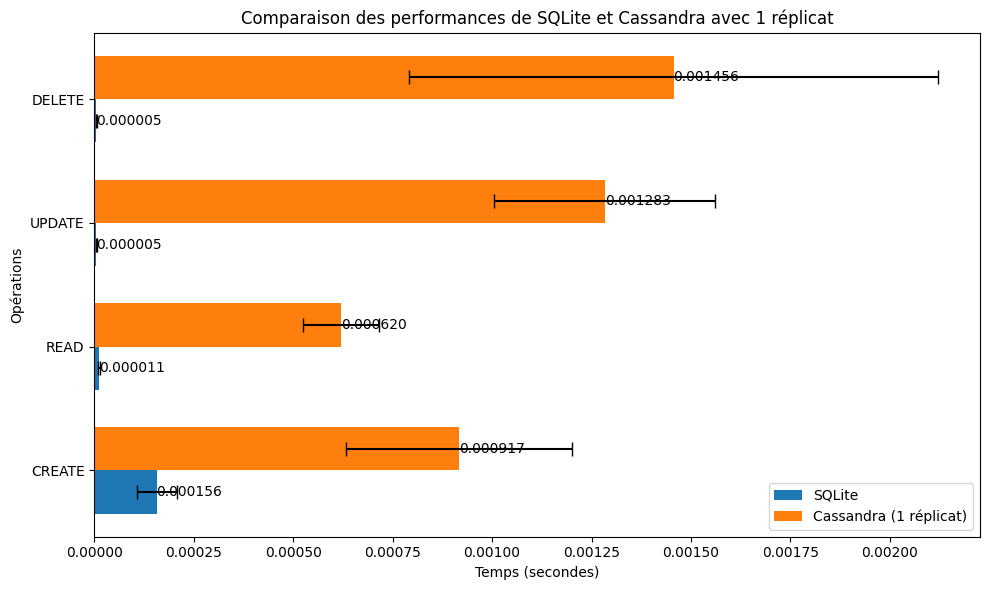

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Valeurs de temps pour SQLite
sqlite_times = {
    'CREATE': (create_sqlite_mean, create_sqlite_std),
    'READ': (read_sqlite_mean, read_sqlite_std),
    'UPDATE': (update_sqlite_mean, update_sqlite_std),
    'DELETE': (delete_sqlite_mean, delete_sqlite_std)
}

# Valeurs de temps pour Cassandra avec 1 réplicat
cassandra_times = {
    'CREATE': (create_cassandra_mean, create_cassandra_std),
    'READ': (read_cassandra_mean, read_cassandra_std),
    'UPDATE': (update_cassandra_mean, update_cassandra_std),
    'DELETE': (delete_cassandra_mean, delete_cassandra_std)
}

operations = ['CREATE', 'READ', 'UPDATE', 'DELETE']

sqlite_means = [sqlite_times[op][0] for op in operations]
sqlite_stds = [sqlite_times[op][1] for op in operations]

cassandra_means = [cassandra_times[op][0] for op in operations]
cassandra_stds = [cassandra_times[op][1] for op in operations]

y = np.arange(len(operations))
height = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.barh(y - height / 2, sqlite_means, height, xerr=sqlite_stds, label='SQLite', capsize=5)
bars2 = ax.barh(y + height / 2, cassandra_means, height, xerr=cassandra_stds, label='Cassandra (1 réplicat)', capsize=5)

ax.set_xlabel('Temps (secondes)')
ax.set_ylabel('Opérations')
ax.set_title('Comparaison des performances de SQLite et Cassandra avec 1 réplicat')
ax.set_yticks(y)
ax.set_yticklabels(operations)
ax.legend()

def add_values(bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.6f}', va='center', ha='left')

add_values(bars1)
add_values(bars2)

plt.tight_layout()
plt.show()


TODO rédaction comme analyse de la visualisation 
cassandra bien plus long 

regardons avec plus de données 

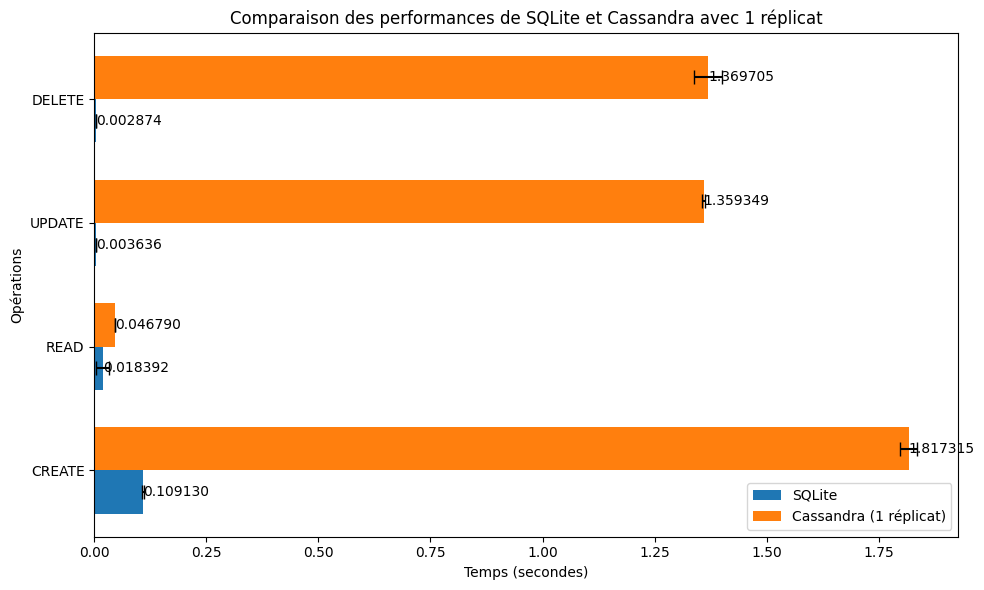

In [68]:
sqlite_times = {
    'CREATE': (create_sqlite_massive_mean, create_sqlite_massive_std),
    'READ': (read_sqlite_massive_mean, read_sqlite_massive_std),
    'UPDATE': (update_sqlite_massive_mean, update_sqlite_massive_std),
    'DELETE': (delete_sqlite_massive_mean, delete_sqlite_massive_std)
}

cassandra_times = {
    'CREATE': (create_cassandra_massive_mean, create_cassandra_massive_std),
    'READ': (read_cassandra_massive_mean, read_cassandra_massive_std),
    'UPDATE': (update_cassandra_massive_mean, update_cassandra_massive_std),
    'DELETE': (delete_cassandra_massive_mean, delete_cassandra_massive_std)
}

operations = ['CREATE', 'READ', 'UPDATE', 'DELETE']

sqlite_means = [sqlite_times[op][0] for op in operations]
sqlite_stds = [sqlite_times[op][1] for op in operations]

cassandra_means = [cassandra_times[op][0] for op in operations]
cassandra_stds = [cassandra_times[op][1] for op in operations]

y = np.arange(len(operations))
height = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.barh(y - height / 2, sqlite_means, height, xerr=sqlite_stds, label='SQLite', capsize=5)
bars2 = ax.barh(y + height / 2, cassandra_means, height, xerr=cassandra_stds, label='Cassandra (1 réplicat)', capsize=5)

ax.set_xlabel('Temps (secondes)')
ax.set_ylabel('Opérations')
ax.set_title('Comparaison des performances de SQLite et Cassandra avec 1 réplicat')
ax.set_yticks(y)
ax.set_yticklabels(operations)
ax.legend()

def add_values(bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.6f}', va='center', ha='left')

add_values(bars1)
add_values(bars2)

plt.tight_layout()
plt.show()

TODO : rédiger commentairte sur le temps ici sur données massif (8k)
pourquoi c'est peut etre normal ?
rappel que ici cassandra c'est 1 replica set
et que y a pas d'index

idée d'explications : 

- SQLite est une base de données embarquée :
SQLite est une base de données légère et locale, conçue pour fonctionner sur des systèmes où les ressources sont limitées. Elle est souvent utilisée pour des bases de données petites à moyennes, et elle est optimisée pour être rapide dans des environnements où il n'y a pas de forte concurrence ou de distribution.
Comme SQLite est embarquée, elle utilise le même processus que ton application, ce qui peut réduire les frais généraux liés aux appels réseau et aux processus séparés nécessaires pour une base de données distribuée comme Cassandra.

- Replication et gestion des nœuds dans Cassandra :
L'activation de la réplication dans Cassandra, même avec des facteurs de réplication faibles, introduit une complexité supplémentaire. Le fait que Cassandra doive gérer des copies des données sur plusieurs nœuds (et potentiellement attendre des confirmations d'écriture/lecture de ces nœuds) peut ralentir les performances, surtout pour des petites bases de données.
Le facteur de réplication dans Cassandra peut augmenter le temps de réponse des écritures et lectures, car les données doivent être synchronisées entre plusieurs nœuds. Dans une petite base de données, cela peut devenir un goulot d'étranglement inutile.


- Coût de gestion des partitions et de la distribution :
Cassandra est conçue pour gérer de grandes quantités de données distribuées sur plusieurs machines. Si ta base de données est petite, Cassandra pourrait avoir un coût supplémentaire lié à la gestion des partitions et des nœuds, ce qui ralentirait les performances comparées à SQLite, qui n'a pas besoin de gérer cette distribution.


- Caching et optimisation :
SQLite peut tirer parti du caching local pour accélérer les lectures, surtout lorsqu'il y a peu de données et que tout peut être chargé en mémoire.
Cassandra, d'autre part, peut nécessiter davantage de gestion des caches, de coordination entre les nœuds, et de répartition des données avant de pouvoir renvoyer les résultats d'une requête, ce qui peut rendre le processus plus lent pour des petites bases.

## Comparaison des temps de Cassandra avec plusieurs replicaSet

##### Qu'est ce que *SimpleStrategy*
Description : Réplique les données de manière linéaire sur les n nœuds du cluster, où n est le replication_factor.
- Avantages :
    - Simple à configurer.
    - Adapté aux environnements de test ou aux clusters d'une seule région.
- Inconvénients :
    - Pas optimisé pour les déploiements multi-régions.
    - Répartition des réplicas pas toujours équilibrée en cas de cluster complexe.

In [69]:
# 2 replicas
# --- CREATE ---
create_cassandra_massive_mean_2, create_cassandra_massive_std_2 = benchmark_operation(cassandra_insert, df_initial, 2)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_2:.6f}s, Std Time = {create_cassandra_massive_std_2:.6f}s")

# --- READ ---
read_cassandra_massive_mean_2, read_cassandra_massive_std_2 = benchmark_operation(cassandra_read, df_initial, 2)
print(f"READ: Mean Time = {read_cassandra_massive_mean_2:.6f}s, Std Time = {read_cassandra_massive_std_2:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_2, update_cassandra_massive_std_2 = benchmark_operation(cassandra_update, df_initial, 2)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_2:.6f}s, Std Time = {update_cassandra_massive_std_2:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_2, delete_cassandra_massive_std_2 = benchmark_operation(cassandra_delete, df_initial, 2)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_2:.6f}s, Std Time = {delete_cassandra_massive_std_2:.6f}s")

replication factor = 2
Create Time: 1.772885 seconds
replication factor = 2
Create Time: 1.887327 seconds
replication factor = 2
Create Time: 1.766648 seconds
replication factor = 2
Create Time: 1.853099 seconds
replication factor = 2
Create Time: 1.923713 seconds
CREATE: Mean Time = 1.840734s, Std Time = 0.062131s
replication factor = 2
Create Time: 1.828217 seconds
Read Time: 0.048476 seconds
Queried 8245 records
replication factor = 2
Create Time: 1.879296 seconds
Read Time: 0.046617 seconds
Queried 8245 records
replication factor = 2
Create Time: 1.843858 seconds
Read Time: 0.050630 seconds
Queried 8245 records
replication factor = 2
Create Time: 1.809161 seconds
Read Time: 0.047029 seconds
Queried 8245 records
replication factor = 2
Create Time: 1.805730 seconds
Read Time: 0.047034 seconds
Queried 8245 records
READ: Mean Time = 0.047957s, Std Time = 0.001478s
replication factor = 2
Create Time: 1.885078 seconds
Update Time: 1.359259 seconds
replication factor = 2
Create Time: 1.83

In [70]:
# 3 replicas
# --- CREATE ---
create_cassandra_massive_mean_3, create_cassandra_massive_std_3 = benchmark_operation(cassandra_insert, df_initial, 3)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_3:.6f}s, Std Time = {create_cassandra_massive_std_3:.6f}s")

# --- READ ---
read_cassandra_massive_mean_3, read_cassandra_massive_std_3 = benchmark_operation(cassandra_read, df_initial, 3)
print(f"READ: Mean Time = {read_cassandra_massive_mean_3:.6f}s, Std Time = {read_cassandra_massive_std_3:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_3, update_cassandra_massive_std_3 = benchmark_operation(cassandra_update, df_initial, 3)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_3:.6f}s, Std Time = {update_cassandra_massive_std_3:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_3, delete_cassandra_massive_std_3 = benchmark_operation(cassandra_delete, df_initial, 3)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_3:.6f}s, Std Time = {delete_cassandra_massive_std_3:.6f}s")


replication factor = 3
Create Time: 1.735063 seconds
replication factor = 3
Create Time: 1.739342 seconds
replication factor = 3
Create Time: 1.744607 seconds
replication factor = 3
Create Time: 1.753484 seconds
replication factor = 3
Create Time: 1.792760 seconds
CREATE: Mean Time = 1.753051s, Std Time = 0.020784s
replication factor = 3
Create Time: 1.742356 seconds
Read Time: 0.045789 seconds
Queried 8245 records
replication factor = 3
Create Time: 1.733712 seconds
Read Time: 0.045592 seconds
Queried 8245 records
replication factor = 3
Create Time: 1.744261 seconds
Read Time: 0.085726 seconds
Queried 8245 records
replication factor = 3
Create Time: 1.840737 seconds
Read Time: 0.047935 seconds
Queried 8245 records
replication factor = 3
Create Time: 1.861296 seconds
Read Time: 0.051246 seconds
Queried 8245 records
READ: Mean Time = 0.055257s, Std Time = 0.015370s
replication factor = 3
Create Time: 1.851602 seconds
Update Time: 1.414924 seconds
replication factor = 3
Create Time: 1.84

In [71]:
# # 4 replicas
# # --- CREATE ---
# create_cassandra_massive_mean_4, create_cassandra_massive_std_4 = benchmark_operation(cassandra_insert, df_initial, 4)
# print(f"CREATE: Mean Time = {create_cassandra_massive_mean_4:.6f}s, Std Time = {create_cassandra_massive_std_4:.6f}s")

# # --- READ ---
# read_cassandra_massive_mean_4, read_cassandra_massive_std_4 = benchmark_operation(cassandra_read, df_initial, 4)
# print(f"READ: Mean Time = {read_cassandra_massive_mean_4:.6f}s, Std Time = {read_cassandra_massive_std_4:.6f}s")

# # --- UPDATE ---
# update_cassandra_massive_mean_4, update_cassandra_massive_std_4 = benchmark_operation(cassandra_update, df_initial, 4)
# print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_4:.6f}s, Std Time = {update_cassandra_massive_std_4:.6f}s")

# # --- DELETE ---
# delete_cassandra_massive_mean_4, delete_cassandra_massive_std_4 = benchmark_operation(cassandra_delete, df_initial, 4)
# print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_4:.6f}s, Std Time = {delete_cassandra_massive_std_4:.6f}s")

In [72]:
# # 5 replicas
# # --- CREATE ---
# create_cassandra_massive_mean_5, create_cassandra_massive_std_5 = benchmark_operation(cassandra_insert, df_initial, 5)
# print(f"CREATE: Mean Time = {create_cassandra_massive_mean_5:.6f}s, Std Time = {create_cassandra_massive_std_5:.6f}s")

# # --- READ ---
# read_cassandra_massive_mean_5, read_cassandra_massive_std_5 = benchmark_operation(cassandra_read, df_initial, 5)
# print(f"READ: Mean Time = {read_cassandra_massive_mean_5:.6f}s, Std Time = {read_cassandra_massive_std_5:.6f}s")

# # --- UPDATE ---
# update_cassandra_massive_mean_5, update_cassandra_massive_std_5 = benchmark_operation(cassandra_update, df_initial, 5)
# print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_5:.6f}s, Std Time = {update_cassandra_massive_std_5:.6f}s")

# # --- DELETE ---
# delete_cassandra_massive_mean_5, delete_cassandra_massive_std_5 = benchmark_operation(cassandra_delete, df_initial, 5)
# print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_5:.6f}s, Std Time = {delete_cassandra_massive_std_5:.6f}s")

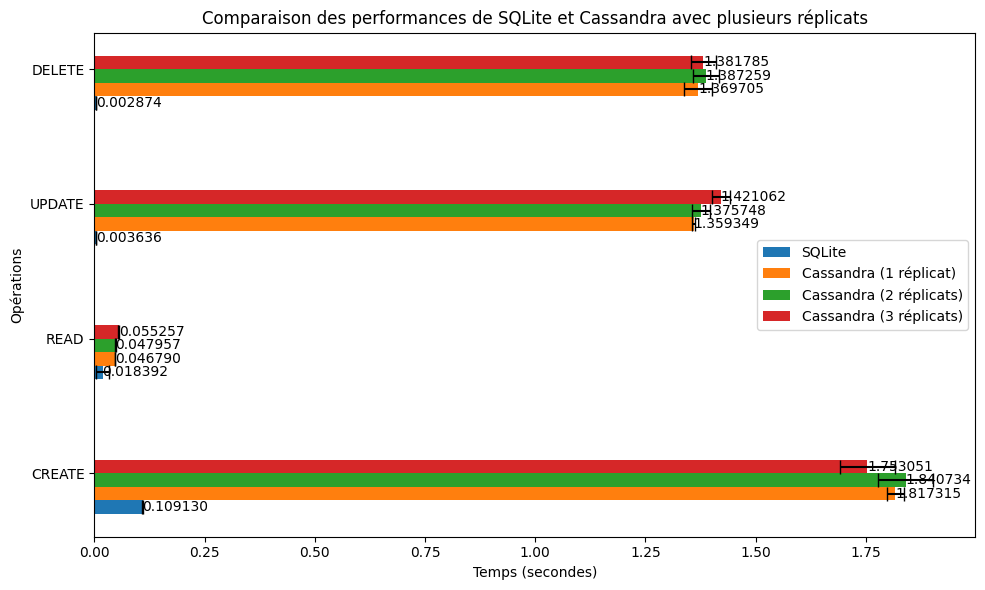

In [73]:
# Valeurs de temps pour SQLite
sqlite_times = {
    'CREATE': (create_sqlite_massive_mean, create_sqlite_massive_std),
    'READ': (read_sqlite_massive_mean, read_sqlite_massive_std),
    'UPDATE': (update_sqlite_massive_mean, update_sqlite_massive_std),
    'DELETE': (delete_sqlite_massive_mean, delete_sqlite_massive_std)
}

# Valeurs de temps pour Cassandra avec 1 réplicat
cassandra_times = {
    'CREATE': (create_cassandra_massive_mean, create_cassandra_massive_std),
    'READ': (read_cassandra_massive_mean, read_cassandra_massive_std),
    'UPDATE': (update_cassandra_massive_mean, update_cassandra_massive_std),
    'DELETE': (delete_cassandra_massive_mean, delete_cassandra_massive_std)
}

cassandra_times_2 = {
    'CREATE': (create_cassandra_massive_mean_2, create_cassandra_massive_std_2),
    'READ': (read_cassandra_massive_mean_2, read_cassandra_massive_std_2),
    'UPDATE': (update_cassandra_massive_mean_2, update_cassandra_massive_std_2),
    'DELETE': (delete_cassandra_massive_mean_2, delete_cassandra_massive_std_2)
}

cassandra_times_3 = {
    'CREATE': (create_cassandra_massive_mean_3, create_cassandra_massive_std_3),
    'READ': (read_cassandra_massive_mean_3, read_cassandra_massive_std_3),
    'UPDATE': (update_cassandra_massive_mean_3, update_cassandra_massive_std_3),
    'DELETE': (delete_cassandra_massive_mean_3, delete_cassandra_massive_std_3)
}

# cassandra_times_4 = {
#     'CREATE': (create_cassandra_massive_mean_4, create_cassandra_massive_std_4),
#     'READ': (read_cassandra_massive_mean_4, read_cassandra_massive_std_4),
#     'UPDATE': (update_cassandra_massive_mean_4, update_cassandra_massive_std_4),
#     'DELETE': (delete_cassandra_massive_mean_4, delete_cassandra_massive_std_4)
# }

# cassandra_times_5 = {
#     'CREATE': (create_cassandra_massive_mean_5, create_cassandra_massive_std_5),
#     'READ': (read_cassandra_massive_mean_5, read_cassandra_massive_std_5),
#     'UPDATE': (update_cassandra_massive_mean_5, update_cassandra_massive_std_5),
#     'DELETE': (delete_cassandra_massive_mean_5, delete_cassandra_massive_std_5)
# }

operations = ['CREATE', 'READ', 'UPDATE', 'DELETE']

# Extraire les temps moyens et écarts-types pour chaque système
sqlite_means = [sqlite_times[op][0] for op in operations]
sqlite_stds = [sqlite_times[op][1] for op in operations]

cassandra_means = [cassandra_times[op][0] for op in operations]
cassandra_stds = [cassandra_times[op][1] for op in operations]

cassandra_means_2 = [cassandra_times_2[op][0] for op in operations]
cassandra_stds_2 = [cassandra_times_2[op][1] for op in operations]

cassandra_means_3 = [cassandra_times_3[op][0] for op in operations]
cassandra_stds_3 = [cassandra_times_3[op][1] for op in operations]

# cassandra_means_4 = [cassandra_times_4[op][0] for op in operations]
# cassandra_stds_4 = [cassandra_times_4[op][1] for op in operations]

# cassandra_means_5 = [cassandra_times_5[op][0] for op in operations]
# cassandra_stds_5 = [cassandra_times_5[op][1] for op in operations]

y = np.arange(len(operations))
height = 0.1
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.barh(y - 2.5 * height, sqlite_means, height, xerr=sqlite_stds, label='SQLite', capsize=5)
bars2 = ax.barh(y - 1.5 * height, cassandra_means, height, xerr=cassandra_stds, label='Cassandra (1 réplicat)', capsize=5)
bars3 = ax.barh(y - 0.5 * height, cassandra_means_2, height, xerr=cassandra_stds_2, label='Cassandra (2 réplicats)', capsize=5)
bars4 = ax.barh(y + 0.5 * height, cassandra_means_3, height, xerr=cassandra_stds_2, label='Cassandra (3 réplicats)', capsize=5)
# bars5 = ax.barh(y + 1.5 * height, cassandra_means_4, height, xerr=cassandra_stds_2, label='Cassandra (4 réplicats)', capsize=5)
# bars6 = ax.barh(y + 2.5 * height, cassandra_means_5, height, xerr=cassandra_stds_2, label='Cassandra (5 réplicats)', capsize=5)

ax.set_xlabel('Temps (secondes)')
ax.set_ylabel('Opérations')
ax.set_title('Comparaison des performances de SQLite et Cassandra avec plusieurs réplicats')
ax.set_yticks(y)
ax.set_yticklabels(operations)
ax.legend()

def add_values(bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.6f}', va='center', ha='left')

add_values(bars1)
add_values(bars2)
add_values(bars3)
add_values(bars4)
# add_values(bars5)
# add_values(bars6)

plt.tight_layout()
plt.show()

TODO commenter 

expliquer les temps : 

Pourquoi essayer plusieurs niveaux de réplication ?
Impact sur les performances des lectures : Plus vous avez de répliques, plus Cassandra doit examiner plusieurs nœuds pour répondre à une requête de lecture. Cela peut augmenter la latence en fonction du niveau de réplication et de la manière dont les nœuds sont répartis.
Impact sur les écritures : En fonction de la configuration de réplication, chaque écriture doit être propagée vers plusieurs nœuds. Cela peut augmenter le temps d'insertion ou d'update, surtout en cas de faible cohérence (si un niveau de cohérence faible est choisi).
Tolérance aux pannes : Un nombre plus élevé de répliques permet à Cassandra de maintenir la disponibilité même en cas de panne de certains nœuds. Cependant, cela peut aussi introduire des coûts en termes de latence et de consommation de ressources.

TODO on peut essayer par la suite pas avec 1 2 3 mais genre 1 5 10 ?

# Création d'un dataset plus grand

Utiliser une base de données plus grande : Cassandra est mieux adapté pour gérer de grandes quantités de données et pour tirer parti de son architecture distribuée.
On va donc augmenter notre jeu de données 

On crée nous même ce dataset car les sites de création de dataset ne permettent de télécharger que 1000 lignes avec un compte gratuit.

In [74]:
df_initial.shape

(8807, 12)

In [75]:
import pandas as pd
import random

# Activer ou désactiver la génération de données supplémentaires
more_data = True

if more_data:
    # Charger le dataset initial
    original_df = df_initial  # Remplace par ton DataFrame de départ

    # Nombre total de lignes souhaitées
    num_rows = 30000

    # Fonction pour générer des colonnes supplémentaires à partir de données existantes
    def generate_large_column(original_column, size):
        return [random.choice(original_column) for _ in range(size)]

    # Fonction pour générer des IDs uniques
    def generate_unique_show_id(existing_ids, size):
        start_id = max(existing_ids) + 1 if existing_ids else 1
        return [f"{i}" for i in range(start_id, start_id + size)]

    # Générer les données pour chaque colonne
    generated_data = original_df.to_dict(orient='list')  # Convertir en dictionnaire de colonnes

    # Assurer l'unicité des IDs
    existing_ids = set(map(int, original_df["show_id"].tolist()))  # Obtenir les IDs existants
    new_ids = generate_unique_show_id(existing_ids, num_rows - len(original_df))
    generated_data["show_id"].extend(new_ids)

    # Générer les autres colonnes
    for column in original_df.columns:
        if column != "show_id":  # Ne pas regénérer la colonne show_id
            generated_data[column].extend(generate_large_column(original_df[column].tolist(), num_rows - len(original_df)))

    # Créer un DataFrame à partir des données générées
    large_df = pd.DataFrame(generated_data)

    # Supprimer les doublons éventuels (vérifie toutes les colonnes)
    large_df = large_df.drop_duplicates()

    # Remplacer les NaN explicitement pour chaque colonne
    for column in large_df.columns:
        if large_df[column].isnull().any():
            if large_df[column].dtype == "object":
                large_df[column].fillna("Unknown", inplace=True)  # Texte : remplacer par 'Unknown'
            else:
                large_df[column].fillna(0, inplace=True)  # Numérique : remplacer par 0

    # Supprimer les doublons éventuels (vérifie toutes les colonnes)
    large_df = large_df.drop_duplicates()

    # Vérifie qu'il n'y a pas de doublons dans 'show_id'
    if large_df["show_id"].duplicated().any():
        print("Attention : Des doublons existent dans la colonne 'show_id'.")
    else:
        print("Les IDs sont uniques.")

    # Sauvegarder le dataset dans un fichier CSV
    output_file = "netflix_titles_large.csv"
    large_df.to_csv(output_file, index=False)
    print(f"Dataset généré avec {len(large_df)} lignes (lignes dupliquées supprimées) et exporté dans {output_file}.")


Les IDs sont uniques.
Dataset généré avec 30000 lignes (lignes dupliquées supprimées) et exporté dans netflix_titles_large.csv.


In [76]:
large_df.shape

(30000, 12)

In [77]:
# Caster correctement les colonnes 
large_df['show_id'] = large_df['show_id'].astype(int)

large_df['show_id'] = large_df['show_id'].astype(int)
large_df['release_year'] = large_df['release_year'].astype(int)

large_df['type'] = large_df['title'].astype(str)
large_df['title'] = large_df['title'].astype(str)
large_df['director'] = large_df['director'].astype(str)
large_df['cast'] = large_df['cast'].astype(str)
large_df['country'] = large_df['country'].astype(str)
large_df['date_added'] = large_df['date_added'].astype(str)
large_df['rating'] = large_df['rating'].astype(str)
large_df['duration'] = large_df['duration'].astype(str)
large_df['listed_in'] = large_df['listed_in'].astype(str)
large_df['description'] = large_df['description'].astype(str)

In [78]:
# sqlite 
# --- CREATE ---
create_sqlite_massive_mean, create_sqlite_massive_std = benchmark_operation(sqlite_insert, large_df)
print(f"CREATE: Mean Time = {create_sqlite_massive_mean:.6f}s, Std Time = {create_sqlite_massive_std:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_sqlite_massive_mean, read_sqlite_massive_std = benchmark_operation(sqlite_read, large_df)
print(f"READ: Mean Time = {read_sqlite_massive_mean:.6f}s, Std Time = {read_sqlite_massive_std:.6f}s")

# --- UPDATE ---
update_sqlite_massive_mean, update_sqlite_massive_std = benchmark_operation(sqlite_update, large_df)
print(f"UPDATE: Mean Time = {update_sqlite_massive_mean:.6f}s, Std Time = {update_sqlite_massive_std:.6f}s")

# --- DELETE ---
delete_sqlite_massive_mean, delete_sqlite_massive_std = benchmark_operation(sqlite_delete, large_df)
print(f"DELETE: Mean Time = {delete_sqlite_massive_mean:.6f}s, Std Time = {delete_sqlite_massive_std:.6f}s")

Create Time: 0.415347 seconds
Create Time: 0.404760 seconds
Create Time: 0.407491 seconds
Create Time: 0.398600 seconds
Create Time: 0.444137 seconds
CREATE: Mean Time = 0.414067s, Std Time = 0.015968s
Total rows in 'shows' table: 30000
Create Time: 0.402089 seconds
Read Time: 0.043437 seconds
Queried 28080 records
Create Time: 0.396932 seconds
Read Time: 0.039958 seconds
Queried 28080 records
Create Time: 0.402828 seconds
Read Time: 0.039350 seconds
Queried 28080 records
Create Time: 0.400717 seconds
Read Time: 0.038369 seconds
Queried 28080 records
Create Time: 0.414822 seconds
Read Time: 0.040183 seconds
Queried 28080 records
READ: Mean Time = 0.040259s, Std Time = 0.001709s
Create Time: 0.427595 seconds
Update Time: 0.016202 seconds
Create Time: 0.410552 seconds
Update Time: 0.013802 seconds
Create Time: 0.404849 seconds
Update Time: 0.013832 seconds
Create Time: 0.402564 seconds
Update Time: 0.015461 seconds
Create Time: 0.474854 seconds
Update Time: 0.014902 seconds
UPDATE: Mean 

In [80]:
# Cassandra

# 1 replica
# --- CREATE ---
create_cassandra_mean, create_cassandra_std = benchmark_operation(cassandra_insert, large_df, 1)
print(f"CREATE: Mean Time = {create_cassandra_mean:.6f}s, Std Time = {create_cassandra_std:.6f}s")

# Vérifier le nombre de lignes insérées
result = session.execute('SELECT COUNT(*) FROM shows')
row = result.one()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_mean, read_cassandra_std = benchmark_operation(cassandra_read, large_df, 1)
print(f"READ: Mean Time = {read_cassandra_mean:.6f}s, Std Time = {read_cassandra_std:.6f}s")

# --- UPDATE ---
update_cassandra_mean, update_cassandra_std = benchmark_operation(cassandra_update, large_df, 1)
print(f"UPDATE: Mean Time = {update_cassandra_mean:.6f}s, Std Time = {update_cassandra_std:.6f}s")

# --- DELETE ---
delete_cassandra_mean, delete_cassandra_std = benchmark_operation(cassandra_delete, large_df, 1)
print(f"DELETE: Mean Time = {delete_cassandra_mean:.6f}s, Std Time = {delete_cassandra_std:.6f}s")


replication factor = 1
Create Time: 6.182222 seconds
replication factor = 1
Create Time: 6.163453 seconds
replication factor = 1
Create Time: 5.988399 seconds
replication factor = 1
Create Time: 6.031092 seconds
replication factor = 1
Create Time: 5.949257 seconds
CREATE: Mean Time = 6.062885s, Std Time = 0.093622s
Total rows in 'shows' table: 30000
replication factor = 1
Create Time: 6.060622 seconds
Read Time: 0.112518 seconds
Queried 28080 records
replication factor = 1
Create Time: 6.115662 seconds
Read Time: 0.050046 seconds
Queried 28080 records
replication factor = 1
Create Time: 6.058109 seconds
Read Time: 0.047249 seconds
Queried 28080 records
replication factor = 1
Create Time: 5.986995 seconds
Read Time: 0.049161 seconds
Queried 28080 records
replication factor = 1
Create Time: 6.696344 seconds
Read Time: 0.049408 seconds
Queried 28080 records
READ: Mean Time = 0.061676s, Std Time = 0.025438s
replication factor = 1
Create Time: 6.106449 seconds
Update Time: 4.683200 seconds


In [ ]:
# 2 replicas
# --- CREATE ---
create_cassandra_massive_mean_2, create_cassandra_massive_std_2 = benchmark_operation(cassandra_insert, large_df, 2)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_2:.6f}s, Std Time = {create_cassandra_massive_std_2:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_2, read_cassandra_massive_std_2 = benchmark_operation(cassandra_read, large_df, 2)
print(f"READ: Mean Time = {read_cassandra_massive_mean_2:.6f}s, Std Time = {read_cassandra_massive_std_2:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_2, update_cassandra_massive_std_2 = benchmark_operation(cassandra_update, large_df, 2)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_2:.6f}s, Std Time = {update_cassandra_massive_std_2:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_2, delete_cassandra_massive_std_2 = benchmark_operation(cassandra_delete, large_df, 2)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_2:.6f}s, Std Time = {delete_cassandra_massive_std_2:.6f}s")


In [ ]:
# 3 replicas
# --- CREATE ---
create_cassandra_massive_mean_3, create_cassandra_massive_std_3 = benchmark_operation(cassandra_insert, large_df, 3)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_3:.6f}s, Std Time = {create_cassandra_massive_std_3:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_3, read_cassandra_massive_std_3 = benchmark_operation(cassandra_read, large_df, 3)
print(f"READ: Mean Time = {read_cassandra_massive_mean_3:.6f}s, Std Time = {read_cassandra_massive_std_3:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_3, update_cassandra_massive_std_3 = benchmark_operation(cassandra_update, large_df, 3)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_3:.6f}s, Std Time = {update_cassandra_massive_std_3:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_3, delete_cassandra_massive_std_3 = benchmark_operation(cassandra_delete, large_df, 3)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_3:.6f}s, Std Time = {delete_cassandra_massive_std_3:.6f}s")



In [ ]:

# # 4 replicas
# # --- CREATE ---
# create_cassandra_massive_mean_4, create_cassandra_massive_std_4 = benchmark_operation(cassandra_insert, large_df, 4)
# print(f"CREATE: Mean Time = {create_cassandra_massive_mean_4:.6f}s, Std Time = {create_cassandra_massive_std_4:.6f}s")

# # Vérifier le nombre de lignes insérées
# cursor.execute('SELECT COUNT(*) FROM shows')
# row = cursor.fetchone()
# print(f"Total rows in 'shows' table: {row[0]}")

# # --- READ ---
# read_cassandra_massive_mean_4, read_cassandra_massive_std_4 = benchmark_operation(cassandra_read, large_df, 4)
# print(f"READ: Mean Time = {read_cassandra_massive_mean_4:.6f}s, Std Time = {read_cassandra_massive_std_4:.6f}s")

# # --- UPDATE ---
# update_cassandra_massive_mean_4, update_cassandra_massive_std_4 = benchmark_operation(cassandra_update, large_df, 4)
# print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_4:.6f}s, Std Time = {update_cassandra_massive_std_4:.6f}s")

# # --- DELETE ---
# delete_cassandra_massive_mean_4, delete_cassandra_massive_std_4 = benchmark_operation(cassandra_delete, large_df, 4)
# print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_4:.6f}s, Std Time = {delete_cassandra_massive_std_4:.6f}s")

# # 5 replicas
# # --- CREATE ---
# create_cassandra_massive_mean_5, create_cassandra_massive_std_5 = benchmark_operation(cassandra_insert, large_df, 5)
# print(f"CREATE: Mean Time = {create_cassandra_massive_mean_5:.6f}s, Std Time = {create_cassandra_massive_std_5:.6f}s")

# # Vérifier le nombre de lignes insérées
# cursor.execute('SELECT COUNT(*) FROM shows')
# row = cursor.fetchone()
# print(f"Total rows in 'shows' table: {row[0]}")

# # --- READ ---
# read_cassandra_massive_mean_5, read_cassandra_massive_std_5 = benchmark_operation(cassandra_read, large_df, 5)
# print(f"READ: Mean Time = {read_cassandra_massive_mean_5:.6f}s, Std Time = {read_cassandra_massive_std_5:.6f}s")

# # --- UPDATE ---
# update_cassandra_massive_mean_5, update_cassandra_massive_std_5 = benchmark_operation(cassandra_update, large_df, 5)
# print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_5:.6f}s, Std Time = {update_cassandra_massive_std_5:.6f}s")

# # --- DELETE ---
# delete_cassandra_massive_mean_5, delete_cassandra_massive_std_5 = benchmark_operation(cassandra_delete, large_df, 5)
# print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_5:.6f}s, Std Time = {delete_cassandra_massive_std_5:.6f}s")

## Visualisation

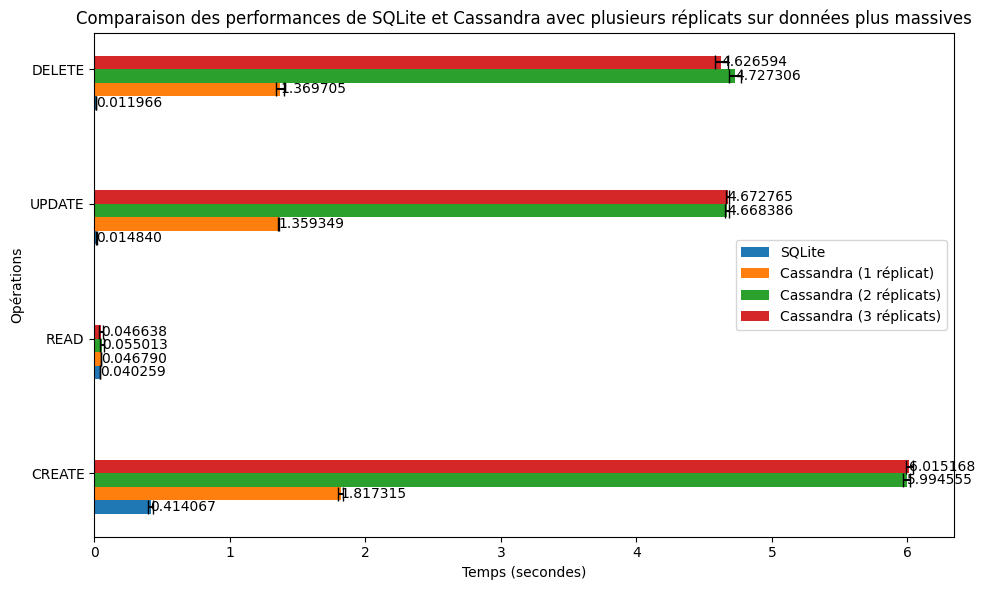

In [81]:
sqlite_times = {
    'CREATE': (create_sqlite_massive_mean, create_sqlite_massive_std),
    'READ': (read_sqlite_massive_mean, read_sqlite_massive_std),
    'UPDATE': (update_sqlite_massive_mean, update_sqlite_massive_std),
    'DELETE': (delete_sqlite_massive_mean, delete_sqlite_massive_std)
}

cassandra_times = {
    'CREATE': (create_cassandra_massive_mean, create_cassandra_massive_std),
    'READ': (read_cassandra_massive_mean, read_cassandra_massive_std),
    'UPDATE': (update_cassandra_massive_mean, update_cassandra_massive_std),
    'DELETE': (delete_cassandra_massive_mean, delete_cassandra_massive_std)
}

cassandra_times_2 = {
    'CREATE': (create_cassandra_massive_mean_2, create_cassandra_massive_std_2),
    'READ': (read_cassandra_massive_mean_2, read_cassandra_massive_std_2),
    'UPDATE': (update_cassandra_massive_mean_2, update_cassandra_massive_std_2),
    'DELETE': (delete_cassandra_massive_mean_2, delete_cassandra_massive_std_2)
}

cassandra_times_3 = {
    'CREATE': (create_cassandra_massive_mean_3, create_cassandra_massive_std_3),
    'READ': (read_cassandra_massive_mean_3, read_cassandra_massive_std_3),
    'UPDATE': (update_cassandra_massive_mean_3, update_cassandra_massive_std_3),
    'DELETE': (delete_cassandra_massive_mean_3, delete_cassandra_massive_std_3)
}

# cassandra_times_4 = {
#     'CREATE': (create_cassandra_massive_mean_4, create_cassandra_massive_std_4),
#     'READ': (read_cassandra_massive_mean_4, read_cassandra_massive_std_4),
#     'UPDATE': (update_cassandra_massive_mean_4, update_cassandra_massive_std_4),
#     'DELETE': (delete_cassandra_massive_mean_4, delete_cassandra_massive_std_4)
# }

# cassandra_times_5 = {
#     'CREATE': (create_cassandra_massive_mean_5, create_cassandra_massive_std_5),
#     'READ': (read_cassandra_massive_mean_5, read_cassandra_massive_std_5),
#     'UPDATE': (update_cassandra_massive_mean_5, update_cassandra_massive_std_5),
#     'DELETE': (delete_cassandra_massive_mean_5, delete_cassandra_massive_std_5)
# }

operations = ['CREATE', 'READ', 'UPDATE', 'DELETE']

# Extraire les temps moyens et écarts-types pour chaque système
sqlite_means = [sqlite_times[op][0] for op in operations]
sqlite_stds = [sqlite_times[op][1] for op in operations]

cassandra_means = [cassandra_times[op][0] for op in operations]
cassandra_stds = [cassandra_times[op][1] for op in operations]

cassandra_means_2 = [cassandra_times_2[op][0] for op in operations]
cassandra_stds_2 = [cassandra_times_2[op][1] for op in operations]

cassandra_means_3 = [cassandra_times_3[op][0] for op in operations]
cassandra_stds_3 = [cassandra_times_3[op][1] for op in operations]

# cassandra_means_4 = [cassandra_times_4[op][0] for op in operations]
# cassandra_stds_4 = [cassandra_times_4[op][1] for op in operations]

# cassandra_means_5 = [cassandra_times_5[op][0] for op in operations]
# cassandra_stds_5 = [cassandra_times_5[op][1] for op in operations]

y = np.arange(len(operations))
height = 0.1
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.barh(y - 2.5 * height, sqlite_means, height, xerr=sqlite_stds, label='SQLite', capsize=5)
bars2 = ax.barh(y - 1.5 * height, cassandra_means, height, xerr=cassandra_stds, label='Cassandra (1 réplicat)', capsize=5)
bars3 = ax.barh(y - 0.5 * height, cassandra_means_2, height, xerr=cassandra_stds_2, label='Cassandra (2 réplicats)', capsize=5)
bars4 = ax.barh(y + 0.5 * height, cassandra_means_3, height, xerr=cassandra_stds_2, label='Cassandra (3 réplicats)', capsize=5)
# bars5 = ax.barh(y + 1.5 * height, cassandra_means_4, height, xerr=cassandra_stds_2, label='Cassandra (4 réplicats)', capsize=5)
# bars6 = ax.barh(y + 2.5 * height, cassandra_means_5, height, xerr=cassandra_stds_2, label='Cassandra (5 réplicats)', capsize=5)

ax.set_xlabel('Temps (secondes)')
ax.set_ylabel('Opérations')
ax.set_title('Comparaison des performances de SQLite et Cassandra avec plusieurs réplicats sur données plus massives')
ax.set_yticks(y)
ax.set_yticklabels(operations)
ax.legend()

def add_values(bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.6f}', va='center', ha='left')

add_values(bars1)
add_values(bars2)
add_values(bars3)
add_values(bars4)
# add_values(bars5)
# add_values(bars6)

plt.tight_layout()
plt.show()

TODO commenter la visualisation aussi 

On voit bien que 1 replica Set bien plus rapide que plus : y a déjà un commentaire là dessus en haut

# Comparaison avec / sans index

### Index secondaires (clés secondaires)


Dans Cassandra, la commande `CREATE INDEX` permet de créer des index secondaires, qui ne sont pas des clés primaires. Cela permet de filtrer les données sur des colonnes autres que la partition key ou les clustering keys.

#### Avantages des index secondaires

- Facilite les filtres sur des colonnes non clés : Vous pouvez filtrer sur des colonnes autres que la partition key ou les clustering keys, ce qui rend les requêtes plus flexibles.
- Accès plus rapide aux données : Les index secondaires optimisent les requêtes qui filtrent sur certaines colonnes spécifiques, réduisant le nombre de partitions à examiner.

#### Inconvénients des index secondaires

- Risque de surcharge de performance : Sur de grandes tables, si une colonne contient beaucoup de valeurs distinctes, l'index peut devenir lourd et ralentir les performances des écritures et lectures.
- Structure distribuée moins efficace : Les index secondaires sont distribués, mais leur gestion est moins performante que les clés primaires, surtout sur des colonnes avec une haute cardinalité.
- Limitations d'usage : Les index secondaires sont mieux utilisés sur des colonnes avec faible cardinalité. Il est déconseillé de les utiliser pour des colonnes ayant une forte cardinalité ou pour des filtres complexes impliquant plusieurs colonnes.
- `ALLOW FILTERING` : Parfois, pour exécuter une requête avec un index secondaire, vous devrez utiliser `ALLOW FILTERING`, ce qui peut nuire aux performances en scannant une grande partie des données.

In [82]:
def cassandra_create_indexes(columns):
    start_time = time.time()
    for column in columns:
        index_query = f"CREATE INDEX {column}_idx ON shows ({column});"
        session.execute(index_query)
    cassandra_time = time.time() - start_time
    return cassandra_time


def sqlite_create_indexes(columns):
    # drop les index
    for column in columns:
        index_query = f"DROP INDEX IF EXISTS {column}_idx;"
        cursor.execute(index_query)

    start_time = time.time()
    for column in columns:
        # Créer une requête SQL pour chaque colonne
        index_query = f"CREATE INDEX IF NOT EXISTS {column}_idx ON shows ({column});"
        cursor.execute(index_query)
    sqlite_time = time.time() - start_time
    return sqlite_time

columns_to_index = ["release_year"]
cassandra_time_index = cassandra_create_indexes(columns_to_index)
sqlite_time_index = sqlite_create_indexes(columns_to_index)

print(f"Indexation time: Cassandra {cassandra_time_index:.5f}s, SQLite {sqlite_time_index:.5f}s")

Indexation time: Cassandra 0.12535s, SQLite 0.00052s


In [83]:
# Fonctions pour CRUD SQLite avec index

# --- CREATE ---
def sqlite_insert_index(df):
    drop_table_sqlite()
    create_table_sqlite()
    sqlite_create_indexes(columns_to_index)

    columns = ', '.join(df.columns)
    placeholders = ', '.join(['?'] * len(df.columns))
    insert_query = f"INSERT INTO shows ({columns}) VALUES ({placeholders})"

    start_time = time.time()
    for _, row in df.iterrows():
      cursor.execute(insert_query, tuple(row))
    conn.commit()

    create_time_sqlite = time.time() - start_time
    print(f"Create Time: {create_time_sqlite:.6f} seconds")
    return create_time_sqlite

# --- READ ---
def sqlite_read_index(df):
    sqlite_insert_index(df)
    start_time = time.time()
    cursor.execute("SELECT * FROM shows WHERE release_year > 2000")
    result = cursor.fetchall()
    read_time_sqlite = time.time() - start_time
    print(f"Read Time: {read_time_sqlite:.6f} seconds")
    print(f"Queried {len(result)} records")
    return read_time_sqlite

# --- UPDATE ---
def sqlite_update_index(df):
    sqlite_insert_index(df)
    start_time = time.time()
    cursor.execute("UPDATE shows SET rating='PG' WHERE release_year > 2000")
    conn.commit()
    update_time_sqlite = time.time() - start_time
    print(f"Update Time: {update_time_sqlite:.6f} seconds")
    return update_time_sqlite

# --- DELETE ---
def sqlite_delete_index(df):
    sqlite_insert_index(df)
    start_time = time.time()
    cursor.execute("DELETE FROM shows WHERE release_year > 2000")
    conn.commit()
    delete_time_sqlite = time.time() - start_time
    print(f"Delete Time: {delete_time_sqlite:.6f} seconds")
    return delete_time_sqlite

In [84]:
# Fonctions pour CRUD Cassandra avec index
# --- CREATE ---
def cassandra_insert_index(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    drop_table_cassandra()
    create_table_cassandra(nb_repl)
    cassandra_create_indexes(columns_to_index)

    insert_query = session.prepare("INSERT INTO shows (show_id, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)")

    start_time = time.time()
    for _, row in df.iterrows():
        session.execute(insert_query, (row['show_id'], row['title'], row['director'], row['cast'], row['country'], row['date_added'], row['release_year'], row['rating'], row['duration'], row['listed_in'], row['description']))
    create_time = time.time() - start_time

    print(f"Create Time: {create_time:.6f} seconds")

    return create_time


# --- READ ---
def cassandra_read_index(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques
    cassandra_insert_index(df, nb_repl)

    # allow filtering car clef secondaire, pas primaire 
    start_time = time.time()
    result = session.execute('SELECT * FROM shows WHERE release_year > 2000 ALLOW FILTERING ;')
    read_time = time.time() - start_time
    print(f"Read time with index: {read_time:.5f}s")
    num_records = sum(1 for _ in result)
    print(f"Number of records: {num_records}")
    return read_time 


# --- UPDATE ---
def cassandra_update_index(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques
    cassandra_insert_index(df, nb_repl)

    start_time = time.time()
    update_query = "UPDATE shows SET rating = 'PG' WHERE release_year > 2000;"
    session.execute(update_query)
    update_time = time.time() - start_time
    print(f"Update time with index: {update_time:.5f}s")
    return update_time


# --- DELETE ---
def cassandra_delete_index(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques
    cassandra_insert_index(df, nb_repl)

    start_time = time.time()
    delete_query = "DELETE FROM shows WHERE release_year > 2000;"
    session.execute(delete_query)
    delete_time = time.time() - start_time
    print(f"Delete time with index: {delete_time:.5f}s")
    return delete_time

In [86]:
# sqlite 
# --- CREATE ---
create_sqlite_massive_mean_index, create_sqlite_massive_std_index = benchmark_operation(sqlite_insert_index, large_df)
print(f"CREATE: Mean Time = {create_sqlite_massive_mean_index:.6f}s, Std Time = {create_sqlite_massive_std_index:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_sqlite_massive_mean_index, read_sqlite_massive_std_index = benchmark_operation(sqlite_read_index, large_df)
print(f"READ: Mean Time = {read_sqlite_massive_mean_index:.6f}s, Std Time = {read_sqlite_massive_std_index:.6f}s")

# --- UPDATE ---
update_sqlite_massive_mean_index, update_sqlite_massive_std_index = benchmark_operation(sqlite_update_index, large_df)
print(f"UPDATE: Mean Time = {update_sqlite_massive_mean_index:.6f}s, Std Time = {update_sqlite_massive_std_index:.6f}s")

# --- DELETE ---
delete_sqlite_massive_mean_index, delete_sqlite_massive_std_index = benchmark_operation(sqlite_delete_index, large_df)
print(f"DELETE: Mean Time = {delete_sqlite_massive_mean_index:.6f}s, Std Time = {delete_sqlite_massive_std_index:.6f}s")

Create Time: 0.397215 seconds
Create Time: 0.384399 seconds
Create Time: 0.447198 seconds
Create Time: 0.396894 seconds
Create Time: 0.397068 seconds
CREATE: Mean Time = 0.404555s, Std Time = 0.021878s
Total rows in 'shows' table: 30000
Create Time: 0.396960 seconds
Read Time: 0.046580 seconds
Queried 28080 records
Create Time: 0.397216 seconds
Read Time: 0.046911 seconds
Queried 28080 records
Create Time: 0.394831 seconds
Read Time: 0.046943 seconds
Queried 28080 records
Create Time: 0.387253 seconds
Read Time: 0.044581 seconds
Queried 28080 records
Create Time: 0.394779 seconds
Read Time: 0.046340 seconds
Queried 28080 records
READ: Mean Time = 0.046271s, Std Time = 0.000874s
Create Time: 0.392384 seconds
Update Time: 0.019863 seconds
Create Time: 0.389882 seconds
Update Time: 0.019429 seconds
Create Time: 0.397377 seconds
Update Time: 0.020080 seconds
Create Time: 0.388646 seconds
Update Time: 0.019813 seconds
Create Time: 0.390862 seconds
Update Time: 0.019521 seconds
UPDATE: Mean 

In [93]:
# Cassandra

# 1 replica
# --- CREATE ---
create_cassandra_mean_index, create_cassandra_std_index = benchmark_operation(cassandra_insert_index, large_df, 1)
print(f"CREATE: Mean Time = {create_cassandra_mean_index:.6f}s, Std Time = {create_cassandra_std_index:.6f}s")

# --- READ ---
read_cassandra_mean_index, read_cassandra_std_index = benchmark_operation(cassandra_read_index, large_df, 1)
print(f"READ: Mean Time = {read_cassandra_mean_index:.6f}s, Std Time = {read_cassandra_std_index:.6f}s")

# --- UPDATE ---
update_cassandra_mean_index, update_cassandra_std_index = benchmark_operation(cassandra_update_index, large_df, 1)
print(f"UPDATE: Mean Time = {update_cassandra_mean_index:.6f}s, Std Time = {update_cassandra_std_index:.6f}s")

# --- DELETE ---
delete_cassandra_mean_index, delete_cassandra_std_index = benchmark_operation(cassandra_delete_index, large_df, 1)
print(f"DELETE: Mean Time = {delete_cassandra_mean_index:.6f}s, Std Time = {delete_cassandra_std_index:.6f}s")

# 2 replicas
# --- CREATE ---
create_cassandra_massive_mean_2_index, create_cassandra_massive_std_2_index = benchmark_operation(cassandra_insert_index, large_df, 2)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_2_index:.6f}s, Std Time = {create_cassandra_massive_std_2_index:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_2_index, read_cassandra_massive_std_2_index = benchmark_operation(cassandra_read_index, large_df, 2)
print(f"READ: Mean Time = {read_cassandra_massive_mean_2_index:.6f}s, Std Time = {read_cassandra_massive_std_2_index:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_2_index, update_cassandra_massive_std_2_index = benchmark_operation(cassandra_update_index, large_df, 2)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_2_index:.6f}s, Std Time = {update_cassandra_massive_std_2_index:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_2_index, delete_cassandra_massive_std_2_index = benchmark_operation(cassandra_delete_index, large_df, 2)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_2_index:.6f}s, Std Time = {delete_cassandra_massive_std_2_index:.6f}s")

# # 3 replicas
# # --- CREATE ---
# create_cassandra_massive_mean_3_index, create_cassandra_massive_std_3_index = benchmark_operation(cassandra_insert_index, large_df, 3)
# print(f"CREATE: Mean Time = {create_cassandra_massive_mean_3_index:.6f}s, Std Time = {create_cassandra_massive_std_3_index:.6f}s")

# # Vérifier le nombre de lignes insérées
# cursor.execute('SELECT COUNT(*) FROM shows')
# row = cursor.fetchone()
# print(f"Total rows in 'shows' table: {row[0]}")

# # --- READ ---
# read_cassandra_massive_mean_3_index, read_cassandra_massive_std_3_index = benchmark_operation(cassandra_read_index, large_df, 3)
# print(f"READ: Mean Time = {read_cassandra_massive_mean_3_index:.6f}s, Std Time = {read_cassandra_massive_std_3_index:.6f}s")

# # --- UPDATE ---
# update_cassandra_massive_mean_3_index, update_cassandra_massive_std_3_index = benchmark_operation(cassandra_update_index, large_df, 3)
# print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_3_index:.6f}s, Std Time = {update_cassandra_massive_std_3_index:.6f}s")

# # --- DELETE ---
# delete_cassandra_massive_mean_3_index, delete_cassandra_massive_std_3_index = benchmark_operation(cassandra_delete_index, large_df, 3)
# print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_3_index:.6f}s, Std Time = {delete_cassandra_massive_std_3_index:.6f}s")


# # 4 replicas
# # --- CREATE ---
# create_cassandra_massive_mean_4_index, create_cassandra_massive_std_4_index = benchmark_operation(cassandra_insert_index, large_df, 4)
# print(f"CREATE: Mean Time = {create_cassandra_massive_mean_4_index:.6f}s, Std Time = {create_cassandra_massive_std_4_index:.6f}s")

# # Vérifier le nombre de lignes insérées
# cursor.execute('SELECT COUNT(*) FROM shows')
# row = cursor.fetchone()
# print(f"Total rows in 'shows' table: {row[0]}")

# # --- READ ---
# read_cassandra_massive_mean_4_index, read_cassandra_massive_std_4_index = benchmark_operation(cassandra_read_index, large_df, 4)
# print(f"READ: Mean Time = {read_cassandra_massive_mean_4_index:.6f}s, Std Time = {read_cassandra_massive_std_4_index:.6f}s")

# # --- UPDATE ---
# update_cassandra_massive_mean_4_index, update_cassandra_massive_std_4_index = benchmark_operation(cassandra_update_index, large_df, 4)
# print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_4_index:.6f}s, Std Time = {update_cassandra_massive_std_4_index:.6f}s")

# # --- DELETE ---
# delete_cassandra_massive_mean_4_index, delete_cassandra_massive_std_4_index = benchmark_operation(cassandra_delete_index, large_df, 4)
# print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_4_index:.6f}s, Std Time = {delete_cassandra_massive_std_4_index:.6f}s")

# # 5 replicas
# # --- CREATE ---
# create_cassandra_massive_mean_5_index, create_cassandra_massive_std_5_index = benchmark_operation(cassandra_insert_index, large_df, 5)
# print(f"CREATE: Mean Time = {create_cassandra_massive_mean_5_index:.6f}s, Std Time = {create_cassandra_massive_std_5_index:.6f}s")

# # Vérifier le nombre de lignes insérées
# cursor.execute('SELECT COUNT(*) FROM shows')
# row = cursor.fetchone()
# print(f"Total rows in 'shows' table: {row[0]}")

# # --- READ ---
# read_cassandra_massive_mean_5_index, read_cassandra_massive_std_5_index = benchmark_operation(cassandra_read_index, large_df, 5)
# print(f"READ: Mean Time = {read_cassandra_massive_mean_5_index:.6f}s, Std Time = {read_cassandra_massive_std_5_index:.6f}s")

# # --- UPDATE ---
# update_cassandra_massive_mean_5_index, update_cassandra_massive_std_5_index = benchmark_operation(cassandra_update_index, large_df, 5)
# print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_5_index:.6f}s, Std Time = {update_cassandra_massive_std_5_index:.6f}s")

# # --- DELETE ---
# delete_cassandra_massive_mean_5_index, delete_cassandra_massive_std_5_index = benchmark_operation(cassandra_delete_index, large_df, 5)
# print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_5_index:.6f}s, Std Time = {delete_cassandra_massive_std_5_index:.6f}s")

replication factor = 1
Create Time: 6.414343 seconds
replication factor = 1
Create Time: 6.007161 seconds
replication factor = 1
Create Time: 5.996218 seconds
replication factor = 1
Create Time: 6.011371 seconds
replication factor = 1
Create Time: 6.012089 seconds
CREATE: Mean Time = 6.088236s, Std Time = 0.163152s
replication factor = 1
Create Time: 6.012352 seconds
Read time with index: 0.04644s
Number of records: 28080
replication factor = 1
Create Time: 6.067628 seconds
Read time with index: 0.04662s
Number of records: 28080
replication factor = 1
Create Time: 6.106524 seconds
Read time with index: 0.05102s
Number of records: 28080
replication factor = 1
Create Time: 6.269100 seconds
Read time with index: 0.04724s
Number of records: 28080
replication factor = 1
Create Time: 6.139978 seconds
Read time with index: 0.04765s
Number of records: 28080
READ: Mean Time = 0.047796s, Std Time = 0.001668s
replication factor = 1
Create Time: 6.294482 seconds


InvalidRequest: Error from server: code=2200 [Invalid query] message="Some partition key parts are missing: show_id"

In [ ]:
# TODO : afficher différences temps avec et sans index pour chaque 

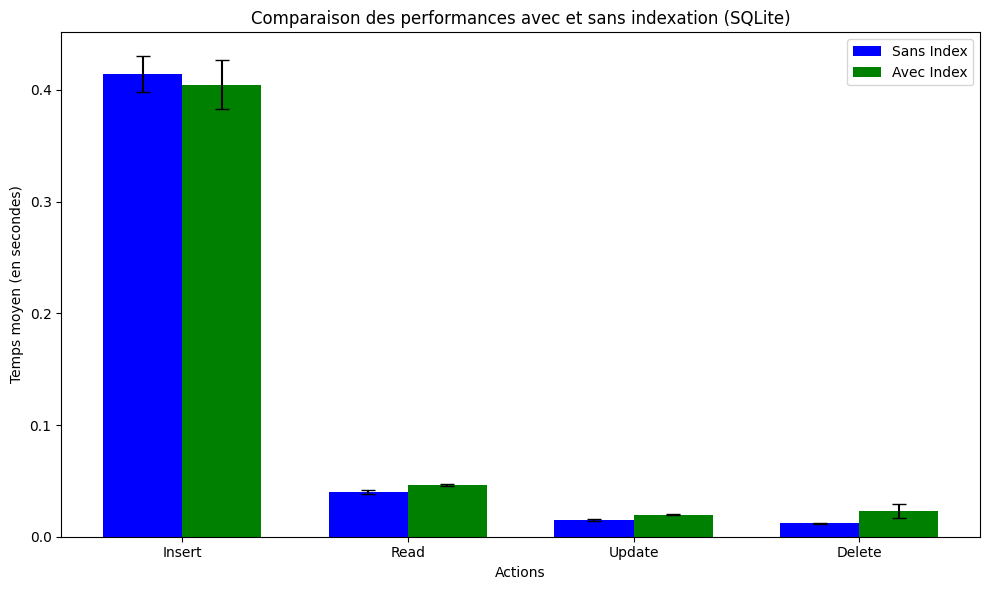

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

actions = ['Insert', 'Read', 'Update', 'Delete']

mean_without_index = [create_sqlite_massive_mean, read_sqlite_massive_mean, 
                      update_sqlite_massive_mean, delete_sqlite_massive_mean]
mean_with_index = [create_sqlite_massive_mean_index, read_sqlite_massive_mean_index, 
                   update_sqlite_massive_mean_index, delete_sqlite_massive_mean_index]

std_without_index = [create_sqlite_massive_std, read_sqlite_massive_std, 
                     update_sqlite_massive_std, delete_sqlite_massive_std]
std_with_index = [create_sqlite_massive_std_index, read_sqlite_massive_std_index, 
                  update_sqlite_massive_std_index, delete_sqlite_massive_std_index]

x = np.arange(len(actions))
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, mean_without_index, width, yerr=std_without_index, label='Sans Index', color='b', capsize=5)
bars2 = ax.bar(x + width/2, mean_with_index, width, yerr=std_with_index, label='Avec Index', color='g', capsize=5)

ax.set_xlabel('Actions')
ax.set_ylabel('Temps moyen (en secondes)')
ax.set_title('Comparaison des performances avec et sans indexation (SQLite)')
ax.set_xticks(x)
ax.set_xticklabels(actions)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

actions = ['Insert', 'Read', 'Update', 'Delete']

mean_without_index = [create_cassandra_mean, read_cassandra_mean, 
                      update_cassandra_mean, delete_cassandra_mean]
mean_with_index = [create_cassandra_mean_index, read_cassandra_mean_index, 
                   update_cassandra_mean_index, delete_cassandra_mean_index]

std_without_index = [create_cassandra_std, read_cassandra_std, 
                     update_cassandra_std, delete_cassandra_std]
std_with_index = [create_cassandra_std_index, read_cassandra_std_index, 
                  update_cassandra_std_index, delete_cassandra_std_index]

x = np.arange(len(actions))
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, mean_without_index, width, yerr=std_without_index, label='Sans Index', color='b', capsize=5)
bars2 = ax.bar(x + width/2, mean_with_index, width, yerr=std_with_index, label='Avec Index', color='g', capsize=5)

ax.set_xlabel('Actions')
ax.set_ylabel('Temps moyen (en secondes)')
ax.set_title('Comparaison des performances avec et sans indexation (cassandra)')
ax.set_xticks(x)
ax.set_xticklabels(actions)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

actions = ['Insert', 'Read', 'Update', 'Delete']

mean_without_index = [create_cassandra_massive_mean_2, read_cassandra_massive_mean_2, 
                      update_cassandra_massive_mean_2, delete_cassandra_massive_mean_2]
mean_with_index = [create_cassandra_massive_mean_2_index, read_cassandra_massive_mean_2_index, 
                   update_cassandra_massive_mean_2_index, delete_cassandra_massive_mean_2_index]

std_without_index = [create_cassandra_massive_std_2, read_cassandra_massive_std_2, 
                     update_cassandra_massive_std_2, delete_cassandra_massive_std_2]
std_with_index = [create_cassandra_massive_std_2_index, read_cassandra_massive_std_2_index, 
                  update_cassandra_massive_std_2_index, delete_cassandra_massive_std_2_index]

x = np.arange(len(actions))
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, mean_without_index, width, yerr=std_without_index, label='Sans Index', color='b', capsize=5)
bars2 = ax.bar(x + width/2, mean_with_index, width, yerr=std_with_index, label='Avec Index', color='g', capsize=5)

ax.set_xlabel('Actions')
ax.set_ylabel('Temps moyen (en secondes)')
ax.set_title('Comparaison des performances avec et sans indexation (cassandra)')
ax.set_xticks(x)
ax.set_xticklabels(actions)
ax.legend()

plt.tight_layout()
plt.show()


NameError: name 'create_cassandra_massive_mean_2_index' is not defined

# ce qu'il reste 

# TODO INDEX sur PRIMARY 
# -> donc filtrer sur le show_id, avec et sans index 

# TODO CLUSTERING : Le clustering est une autre méthode de distribution des données dans Cassandra, mais cela se fait au sein d'une partition (c'est-à-dire que les données ayant la même clé de partition seront rangées ensemble en fonction de la clé de clustering). Le choix d'une bonne clé de clustering permet d’optimiser la lecture des données dans Cassandra.

# TODO : Effectuer des tests de charge : Augmenter le nombre de requêtes ou de transactions simultanées pour tester la scalabilité et la gestion des requêtes par Cassandra. Dans un scénario avec peu de données, SQLite peut sembler plus rapide, mais lorsque la charge augmente, Cassandra sera plus adapté pour gérer des performances à grande échelle

# TODO : BATCH c'est quoi ?
# TODO : REQUETES COMPLEXES
# TODO : JOINS
# TODO : REQUETES AVEC FILTRES

In [ ]:
# TODO Charlotte tu veux dire quoi ?
# Tester avec des requêtes plus complexes
# Utiliser un dataset plus grand (ça c'est au dessus)
#  Ajouter des colonnes à indexer (c'est fait aussi au dessus)
# Tous ces TODO n'ont rien changé.

# Fin du notebook

In [ ]:
# Tout fermer proprement
session.shutdown() # Fermer la connexion Cassandra
cluster.shutdown() # Fermer le cluster Cassandra
conn.close() # Fermer la connexion SQLite
cursor.close() # Fermer le curseur SQLite